# Plotting radial wave function for quark model

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import scipy as sp
from scipy import special, integrate
import os
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
def plot(ax, name, cutoff=[-sp.inf, sp.inf]):
    data = pd.read_csv(name, delimiter=",", index_col=0)
    data = data.loc[(data.index > cutoff[0]) & (data.index < cutoff[1])]
    ax.plot(data.index, data['u'], linestyle="", marker=".")
    ax.axhline(0, ls="--", color="gray")
    return ax

In [5]:
def plotDir(name, cutoff=[-sp.inf, sp.inf]):
    dname = os.path.join("output/"+name+"/data")
    files = list()
    for f in os.listdir(dname):
        fname = os.path.join(dname, f)
        files.append(fname)
    fig, ax = plt.subplots(len(files), figsize=(plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1]*len(files)))
    for theax, thef in zip(ax, files):
        theax.set_title(thef.split("/")[-1])
        plot(theax, thef, cutoff)

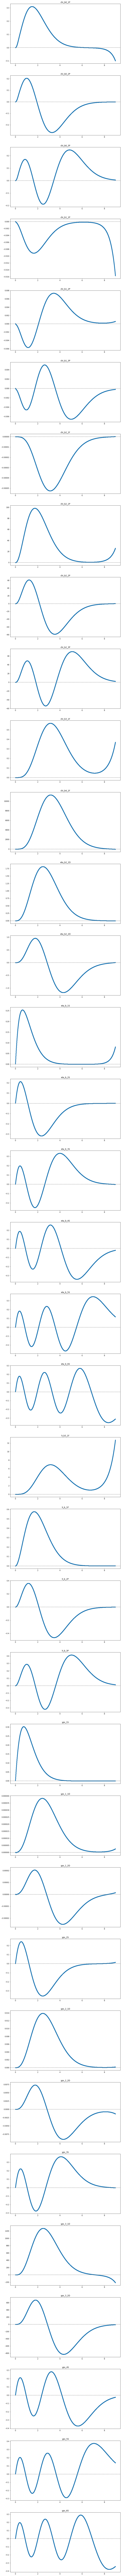

In [6]:
plotDir("scr.b-scr", [-sp.inf, 9])

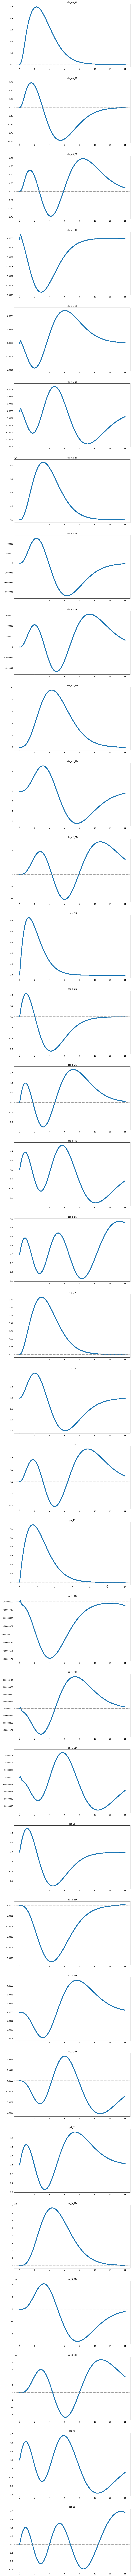

In [7]:
plotDir("scr.c-scr", [-sp.inf, 14])

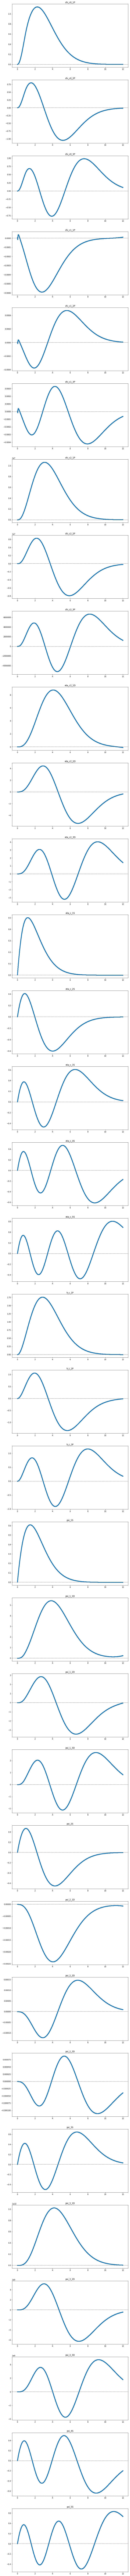

In [8]:
plotDir("lin.c-lin", [-sp.inf, 12])